In [ ]:
# pip install datacompy

In [101]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import nltk
import os
import nltk.corpus
import datetime 
# import datacompy

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [102]:
activity_df = pd.read_csv("/content/drive/My Drive/activity and target data/activity.csv")

In [103]:
# activity_df.head()
activity_df.count()

date              904772
customer          904772
activity_type     904772
activity_count    904772
dtype: int64

In [105]:
target_df = pd.read_csv("/content/drive/My Drive/activity and target data/target.csv")

In [ ]:
target_df.head()

In [107]:
a_df = target_df.merge(activity_df, on=['customer'], how='right') 
a_df.head(20)
# a_df.count()

,customer,date_x,date_y,activity_type,activity_count
0,0032j000002jRYxAAM,NaN,2021-01-20,a,1
1,0032j00000FZcIvAAL,NaN,2021-05-11,a,1
2,0032j000002gKM8AAM,NaN,2020-12-09,a,1
3,0032j000002gKM8AAM,NaN,2020-10-15,l,1
4,0032j000002gKM8AAM,NaN,2020-10-31,l,1
5,0032j000002gKM8AAM,NaN,2021-03-22,l,1
6,0032j000002gKM8AAM,NaN,2020-10-29,l,1
7,0032j000002gKM8AAM,NaN,2020-11-20,l,1
8,0032j000002gKM8AAM,NaN,2020-09-11,v,1
9,0032j000002gKM8AAM,NaN,2021-01-27,v,1


In [108]:
# a_df['activity_type'].isnull().values.any()
a_df['date_x'].isnull().sum()  ## 221 customer deal completed without any activity trace ##

802487

In [109]:
a_df.loc[a_df['date_x'].isnull(),'Deal_completed'] = 'No'
a_df.loc[a_df['date_x'].notnull(), 'Deal_completed'] = 'Yes'
# print(a_df)
a_df.head(10)

,customer,date_x,date_y,activity_type,activity_count,Deal_completed
0,0032j000002jRYxAAM,NaN,2021-01-20,a,1,No
1,0032j00000FZcIvAAL,NaN,2021-05-11,a,1,No
2,0032j000002gKM8AAM,NaN,2020-12-09,a,1,No
3,0032j000002gKM8AAM,NaN,2020-10-15,l,1,No
4,0032j000002gKM8AAM,NaN,2020-10-31,l,1,No
5,0032j000002gKM8AAM,NaN,2021-03-22,l,1,No
6,0032j000002gKM8AAM,NaN,2020-10-29,l,1,No
7,0032j000002gKM8AAM,NaN,2020-11-20,l,1,No
8,0032j000002gKM8AAM,NaN,2020-09-11,v,1,No
9,0032j000002gKM8AAM,NaN,2021-01-27,v,1,No


In [110]:
# Checking the unique customer and closed deal count
n = len(pd.unique(a_df['customer']))
n

139556

In [50]:
n = a_df.Deal_completed.value_counts()
# a_df.count()
n

No     802487
Yes    102285
Name: Deal_completed, dtype: int64

In [111]:
print( a_df['Deal_completed'].value_counts()['Yes'] )

102285


In [112]:
y_df = a_df[a_df.Deal_completed.isin(["Yes"])]
# y_df.head()
# y_df.count()
n = len(pd.unique(y_df['customer']))
n ## 4135 after removing the activity untraced/NaN values##

4135

In [53]:
# compare = datacompy.Compare(activity_df, target_df, join_columns=['customer','date'])
# print(compare.report())

In [163]:
# a_df['created_at'] = pd.to_datetime(NY_df['created_at'])           #Converting date to datetime format
# a_df.dropna(subset = ["date_x"], inplace=True)           #removing empty rows from df
n_df = a_df.dropna(axis =0, how = 'any')
n_df
# a_df.count()                          

,customer,date_x,date_y,activity_type,activity_count,Deal_completed
124,0032j000004etUWAAY,2021-04-07,2020-10-19,a,1,Yes
125,0032j000004etUWAAY,2021-04-07,2021-02-12,d,1,Yes
126,0032j000004etUWAAY,2021-04-07,2021-04-07,h,1,Yes
127,0032j000004etUWAAY,2021-04-07,2021-01-16,h,1,Yes
128,0032j000004etUWAAY,2021-04-07,2021-04-07,v,1,Yes
...,...,...,...,...,...,...
897975,0032j00000GgyZzAAJ,2021-05-17,2021-04-26,o,1,Yes
898004,0032j00000Fa7nHAAR,2021-04-15,2021-04-07,o,1,Yes
898007,0032j00000FaKUvAAN,2021-04-09,2021-04-09,o,1,Yes
898011,0032j00000GiEyuAAF,2021-05-11,2021-05-11,o,1,Yes


In [114]:
n1 = len(pd.unique(n_df['customer']))
n1

4135

In [115]:
n_df['customer'].unique()

array(['0032j000004etUWAAY', '0032j000001UT0JAAW', '0032j000008mxpJAAQ',
       ..., '0032j00000FaKUvAAN', '0032j00000GiEyuAAF',
       '0032j00000Dizo4AAB'], dtype=object)

In [126]:
# n_df['customer'].unique().tolist()

n1_df = n_df.groupby('customer')['activity_count'].sum()

# n1_df = n_df.loc[n_df['customer'] == 1, ['activity_count'].sum()
n1_df

customer
0030o00002nkSnfAAE    27
0030o00002nkSoKAAU    11
0030o00002nkSpLAAU     3
0030o00002nkSpMAAU    18
0030o00002nkStVAAU     3
                      ..
0032j00000GjIkyAAF    32
0032j00000GjJJJAA3     1
0032j00000GjJpKAAV     5
0032j00000GjKJyAAN    58
0032j00000GjPtaAAF    11
Name: activity_count, Length: 4135, dtype: int64

In [142]:
n1_df = n_df[['customer', 'activity_count']]
# n1_df = n_df.groupby['customer'].sum()
n2_df = n_df.drop_duplicates().groupby('customer').count()
n2_df

,date_x,date_y,activity_type,activity_count,Deal_completed
customer,,,,,
0030o00002nkSnfAAE,18,18,18,18,18
0030o00002nkSoKAAU,8,8,8,8,8
0030o00002nkSpLAAU,3,3,3,3,3
0030o00002nkSpMAAU,15,15,15,15,15
0030o00002nkStVAAU,3,3,3,3,3
...,...,...,...,...,...
0032j00000GjIkyAAF,22,22,22,22,22
0032j00000GjJJJAA3,1,1,1,1,1
0032j00000GjJpKAAV,4,4,4,4,4


In [143]:
n3_df = n2_df.drop(columns=['date_x', 'date_y', 'activity_type','Deal_completed'])
n3_df

,activity_count
customer,
0030o00002nkSnfAAE,18
0030o00002nkSoKAAU,8
0030o00002nkSpLAAU,3
0030o00002nkSpMAAU,15
0030o00002nkStVAAU,3
...,...
0032j00000GjIkyAAF,22
0032j00000GjJJJAA3,1
0032j00000GjJpKAAV,4


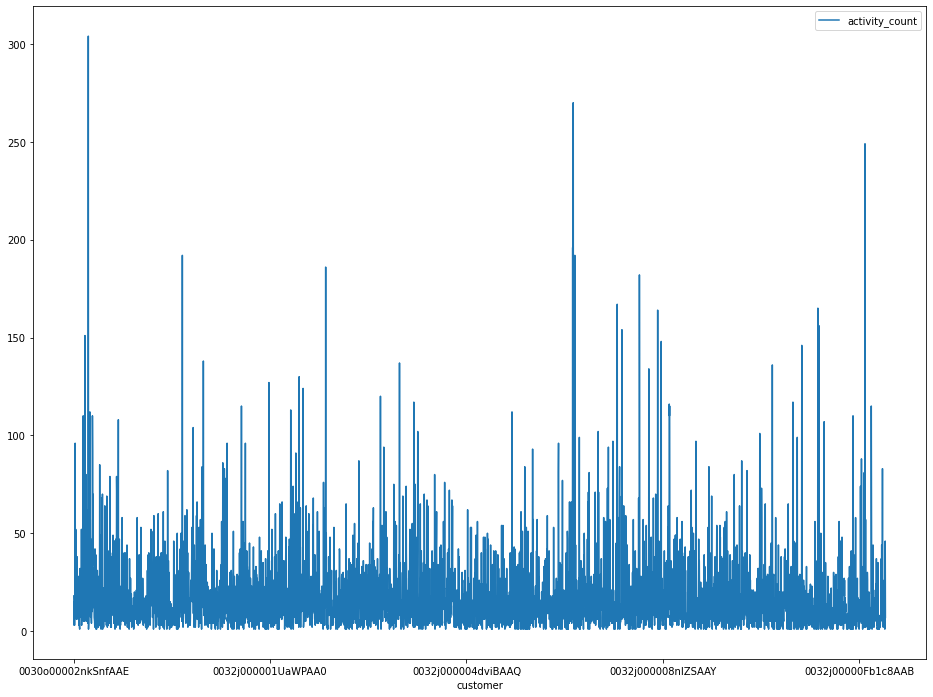

In [144]:
ax = n3_df.plot(figsize = (16, 12))


Activity type to number of customer

In [151]:
from datetime import datetime
n_df['date_x'] = pd.to_datetime(n_df['date_x'])
n_df['date_y'] = pd.to_datetime(n_df['date_y'])
n_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102285 entries, 124 to 898059
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   customer        102285 non-null  object        
 1   date_x          102285 non-null  datetime64[ns]
 2   date_y          102285 non-null  datetime64[ns]
 3   activity_type   102285 non-null  object        
 4   activity_count  102285 non-null  int64         
 5   Deal_completed  102285 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 10.5+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [158]:
na_df = n_df.groupby('activity_type')['activity_count'].sum()
na_df

activity_type
a     4976
b      375
c      108
d      138
e        2
f      117
g       11
h     2667
i     6655
j     1760
k        8
l    23088
m    19570
n    13249
o     1374
p     6045
q       40
r      162
s      781
t     1490
u     3480
v     3424
w     3359
x     4581
y     4825
Name: activity_count, dtype: int64

In [162]:
n1 = len(pd.unique(n_df['activity_type']))
na_df = n_df[['customer', 'activity_count']]
# n1_df = n_df.groupby['customer'].sum()

na_df = n_df.drop_duplicates().groupby('activity_type').count()
na_df = na_df.drop(columns=['activity_count','Deal_completed'])
na_df


,customer,date_x,date_y
activity_type,,,
a,3766,3766,3766
b,302,302,302
c,108,108,108
d,128,128,128
e,2,2,2
f,117,117,117
g,11,11,11
h,2365,2365,2365
i,4291,4291,4291


Linear Regression

In [169]:
target_df1 = target_df.drop_duplicates().groupby('date').count()

In [178]:
target_df1

,customer
date,
2020-11-01,1
2020-11-02,28
2020-11-03,12
2020-11-04,33
2020-11-05,26
...,...
2021-05-18,31
2021-05-19,35
2021-05-20,30


In [189]:
df= pd.DataFrame(columns=['date', 'customer'])
# df['date']= to_datetime(target_df1['date'])
df['deals'] = target_df1["customer"].astype(int)
# df.dropna(subset = ["date"], inplace=True)
df = df.drop(columns=['customer','date'])
df

,deals
date,
2020-11-01,1
2020-11-02,28
2020-11-03,12
2020-11-04,33
2020-11-05,26
...,...
2021-05-18,31
2021-05-19,35
2021-05-20,30


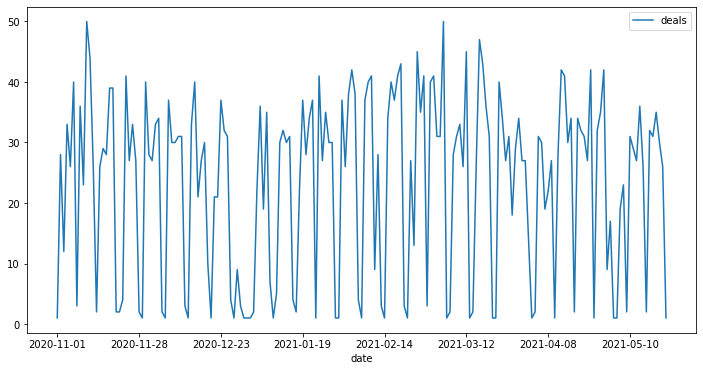

In [191]:
df.plot(figsize=(12,6))

From the plot we can see some additive seasonality but no trend


In [172]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
import statsmodels.api as sm

s=sm.tsa.seasonal_decompose(deals)

In [ ]:
# results = seasonal_decompose(df['deals'])
# parse_dates['DATE'] = series['DATE'].dt.strftime('%Y%m')
# results.plot()

df.reset_index(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
# sm.tsa.seasonal_decompose(df.deals)
df

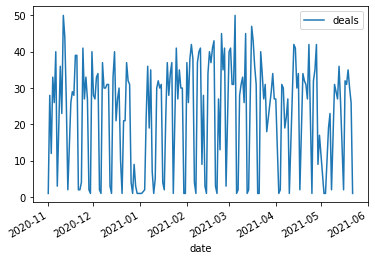

In [203]:
df.plot()

In [205]:
len(df)

187

In [206]:
train = df.iloc [:160]
test = df.iloc [160:]

In [207]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [208]:
df.head(), df.tail()

(            deals
 date             
 2020-11-01      1
 2020-11-02     28
 2020-11-03     12
 2020-11-04     33
 2020-11-05     26,             deals
 date             
 2021-05-18     31
 2021-05-19     35
 2021-05-20     30
 2021-05-21     26
 2021-05-22      1)

In [209]:
scaler.fit(train)
sclaed_train =scaler.transform(train)
scaled_test = scaler.transform(test)


In [210]:
sclaed_train[:10]

array([[0.        ],
       [0.55102041],
       [0.2244898 ],
       [0.65306122],
       [0.51020408],
       [0.79591837],
       [0.04081633],
       [0.71428571],
       [0.44897959],
       [1.        ]])

In [211]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [228]:
n_input = 24
n_features = 1
generator = TimeseriesGenerator(sclaed_train, sclaed_train, length = n_input, batch_size=1)

In [229]:
print(len(sclaed_train), len(generator))

160 136


In [230]:
X, y = generator[4]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.51020408 0.79591837 0.04081633 0.71428571 0.44897959 1.
 0.87755102 0.51020408 0.02040816 0.51020408 0.57142857 0.55102041
 0.7755102  0.7755102  0.02040816 0.02040816 0.06122449 0.81632653
 0.53061224 0.65306122 0.53061224 0.02040816 0.         0.79591837]
Predict this y: 
 [[0.55102041]]


In [231]:
X.shape

(1, 24, 1)

In [232]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [233]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [235]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [242]:
#fit model
model.fit(generator, epochs=80)

Epoch 1/80
136/136 [==============================] - 1s 10ms/step - loss: 0.0357
Epoch 2/80
136/136 [==============================] - 1s 9ms/step - loss: 0.0410
Epoch 3/80
136/136 [==============================] - 1s 9ms/step - loss: 0.0356
Epoch 4/80
136/136 [==============================] - 1s 9ms/step - loss: 0.0354
Epoch 5/80
136/136 [==============================] - 1s 9ms/step - loss: 0.0336
Epoch 6/80
136/136 [==============================] - 1s 9ms/step - loss: 0.0351
Epoch 7/80
136/136 [==============================] - 1s 9ms/step - loss: 0.0386
Epoch 8/80
136/136 [==============================] - 1s 9ms/step - loss: 0.0382
Epoch 9/80
136/136 [==============================] - 1s 9ms/step - loss: 0.0372
Epoch 10/80
136/136 [==============================] - 1s 9ms/step - loss: 0.0365
Epoch 11/80
136/136 [==============================] - 1s 9ms/step - loss: 0.0364
Epoch 12/80
136/136 [==============================] - 1s 9ms/step - loss: 0.0344
Epoch 13/80
136/136 [===

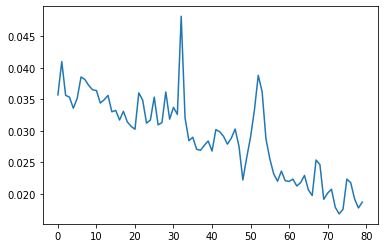

In [243]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [247]:
last_train_batch = sclaed_train[-24:]

In [248]:
last_train_batch = last_train_batch.reshape((1,n_input, n_features))

In [249]:
model.predict(last_train_batch)

array([[0.7480529]], dtype=float32)

In [250]:
scaled_test[1]

array([0.6122449])

In [254]:
test_predictions = []

first_eval_bacth = sclaed_train[-n_input:]
current_batch = first_eval_bacth.reshape((1, n_input, n_features))

for i in range (len(test)):

  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

In [256]:
test_predictions

[array([0.7480529], dtype=float32),
 array([0.65273464], dtype=float32),
 array([0.64575255], dtype=float32),
 array([0.7466209], dtype=float32),
 array([0.03999905], dtype=float32),
 array([-0.00663888], dtype=float32),
 array([0.5910461], dtype=float32),
 array([0.6440009], dtype=float32),
 array([0.582364], dtype=float32),
 array([0.6679043], dtype=float32),
 array([0.67435944], dtype=float32),
 array([0.08150721], dtype=float32),
 array([-0.00286825], dtype=float32),
 array([0.5754626], dtype=float32),
 array([0.645767], dtype=float32),
 array([0.60143924], dtype=float32),
 array([0.5690431], dtype=float32),
 array([0.65223444], dtype=float32),
 array([0.08095318], dtype=float32),
 array([0.01643698], dtype=float32),
 array([0.58332175], dtype=float32),
 array([0.64129436], dtype=float32),
 array([0.59729946], dtype=float32),
 array([0.57411563], dtype=float32),
 array([0.6462715], dtype=float32),
 array([0.07224111], dtype=float32),
 array([0.00694668], dtype=float32)]

In [255]:
current_batch.shape


(1, 24, 1)

In [257]:
test.head()

,deals
date,
2021-04-20,32
2021-04-21,31
2021-04-22,27
2021-04-23,42
2021-04-25,1


In [258]:
true_predictions = scaler.inverse_transform(test_predictions)

In [259]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


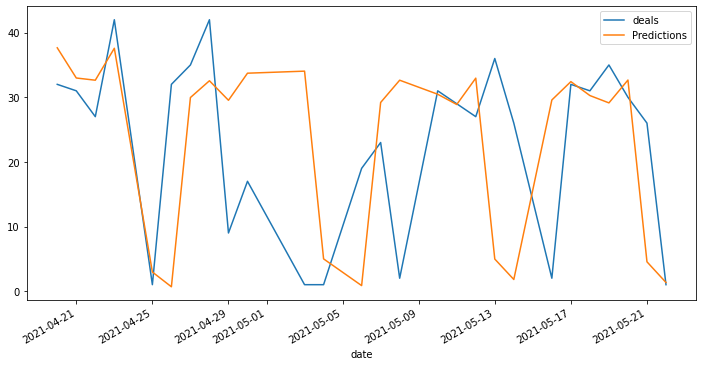

In [260]:
test.plot(figsize=(12,6))

In [261]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['deals'], test['Predictions']))
print(rmse)

16.273962221616138
